[Local](./ch02.ipynb),
[Github](https://github.com/renyuanL/_ryDsp2020/blob/master/code/ch02.ipynb),
[Colab](https://colab.research.google.com/github/renyuanL/_ryDsp2020/blob/master/code/ch02.ipynb)

## Ch02. Harmonics
[textbookCh02](./textbook/harmonics.html)


- Triangle waves
- Square waves
- Aliasing
- Computing the spectrum
- Exercises

# Chapter 2  Harmonics

In this chapter I present several new waveforms; we will look at their spectrums to understand their harmonic structure, which is the set of sinusoids they are made up of.

I’ll also introduce one of the most important phenomena in digital signal processing: aliasing. And I’ll explain a little more about how the Spectrum class works.

The code for this chapter is in chap02.ipynb, which is in the repository for this book (see Section 0.2). You can also view it at http://tinyurl.com/thinkdsp02.

## 2.1  Triangle waves

A sinusoid contains only one frequency component, so its spectrum has only one peak. More complicated waveforms, like the violin recording, yield DFTs with many peaks. In this section we investigate the relationship between waveforms and their spectrums.

![](../textbook/fg/thinkdsp006.png)

Figure 2.1: Segment of a triangle signal at 200 Hz.

![](fg/fg_triangle.png)

----
![](fg/fg_triangle_2.png)

I’ll start with a triangle waveform, which is like a straight-line version of a sinusoid. Figure 2.1 shows a triangle waveform with frequency 200 Hz.

To generate a triangle wave, you can start with a thinkdsp.TriangleSignal:

```python
class TriangleSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = np.abs(frac - 0.5)
        ys = normalize(unbias(ys), self.amp)
        return ys
```

TriangleSignal inherits `__init__` from `class Sinusoid`, so it takes the same arguments: freq, amp, and offset.

The only difference is `def evaluate`. As we saw before, ts is the sequence of sample times where we want to evaluate the signal.

There are many ways to generate a triangle wave. The details are not important, but here’s how evaluate works:

- `cycles` is the number of cycles since the start time. 
- `np.modf` splits the number of cycles into the fraction part, stored in `frac`, and the integer part, which is ignored 1.

- `frac` is a sequence that ramps from 0 to 1 with the given frequency. 
    - Subtracting 0.5 yields values between -0.5 and 0.5. 
    - Taking the absolute value yields a waveform that `zig-zags` between 0.5 and 0.

- `unbias` shifts the waveform down so it is centered at 0; then 
- `normalize` scales it to the given amplitude, amp.

----

作者說來簡單，這裡卻大有學問，讓我們逐行來解析，甚至發展自己的版本來模仿及從中學習重要的技術。

In [1]:
import numpy as np
import thinkdsp
import scipy as sp

6%10, 16%10, 26%10, -6%10,-16%10


(6, 6, 6, 4, 4)

In [2]:
0.6%1.0, 1.6%1.0, 2.6%1.0, -.6%1.0,-1.6%1.0

(0.6, 0.6000000000000001, 0.6000000000000001, 0.4, 0.3999999999999999)

In [3]:
π= np.pi
0.6%π, 1.6%π, 2.6%π, 3.6%π, 10.6%π, (10*π+0.1)%π

(0.6, 1.6, 2.6, 0.458407346410207, 1.1752220392306203, 0.10000000000000142)

- 確認利用 % (mod) 求餘數，可以用在實數。 

In [4]:
def ryTri(θ):
    
    θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)
    
    x0= θ *(-2/np.pi) +1
    x1= θ *(+2/np.pi) -3
    
    x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！
    
    return x


Text(0.5, 0, 'θ (rad)')

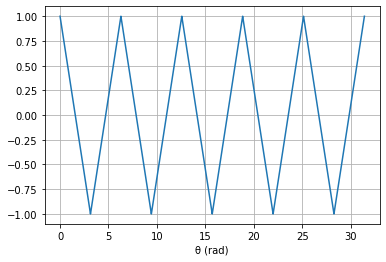

In [5]:
import matplotlib.pyplot as pl

θ= np.linspace(0,10*np.pi, 10001)
x= ryTri(θ)
pl.plot(θ, x)
pl.grid('on')
pl.xlabel('θ (rad)')


In [6]:
# x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

θ = np.linspace(0, 2*np.pi, 101)
θ

array([0.        , 0.06283185, 0.12566371, 0.18849556, 0.25132741,
       0.31415927, 0.37699112, 0.43982297, 0.50265482, 0.56548668,
       0.62831853, 0.69115038, 0.75398224, 0.81681409, 0.87964594,
       0.9424778 , 1.00530965, 1.0681415 , 1.13097336, 1.19380521,
       1.25663706, 1.31946891, 1.38230077, 1.44513262, 1.50796447,
       1.57079633, 1.63362818, 1.69646003, 1.75929189, 1.82212374,
       1.88495559, 1.94778745, 2.0106193 , 2.07345115, 2.136283  ,
       2.19911486, 2.26194671, 2.32477856, 2.38761042, 2.45044227,
       2.51327412, 2.57610598, 2.63893783, 2.70176968, 2.76460154,
       2.82743339, 2.89026524, 2.95309709, 3.01592895, 3.0787608 ,
       3.14159265, 3.20442451, 3.26725636, 3.33008821, 3.39292007,
       3.45575192, 3.51858377, 3.58141563, 3.64424748, 3.70707933,
       3.76991118, 3.83274304, 3.89557489, 3.95840674, 4.0212386 ,
       4.08407045, 4.1469023 , 4.20973416, 4.27256601, 4.33539786,
       4.39822972, 4.46106157, 4.52389342, 4.58672527, 4.64955

In [7]:
θ<np.pi

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [8]:
x0= θ *(-2/np.pi) +1
x0

array([ 1.00000000e+00,  9.60000000e-01,  9.20000000e-01,  8.80000000e-01,
        8.40000000e-01,  8.00000000e-01,  7.60000000e-01,  7.20000000e-01,
        6.80000000e-01,  6.40000000e-01,  6.00000000e-01,  5.60000000e-01,
        5.20000000e-01,  4.80000000e-01,  4.40000000e-01,  4.00000000e-01,
        3.60000000e-01,  3.20000000e-01,  2.80000000e-01,  2.40000000e-01,
        2.00000000e-01,  1.60000000e-01,  1.20000000e-01,  8.00000000e-02,
        4.00000000e-02, -2.22044605e-16, -4.00000000e-02, -8.00000000e-02,
       -1.20000000e-01, -1.60000000e-01, -2.00000000e-01, -2.40000000e-01,
       -2.80000000e-01, -3.20000000e-01, -3.60000000e-01, -4.00000000e-01,
       -4.40000000e-01, -4.80000000e-01, -5.20000000e-01, -5.60000000e-01,
       -6.00000000e-01, -6.40000000e-01, -6.80000000e-01, -7.20000000e-01,
       -7.60000000e-01, -8.00000000e-01, -8.40000000e-01, -8.80000000e-01,
       -9.20000000e-01, -9.60000000e-01, -1.00000000e+00, -1.04000000e+00,
       -1.08000000e+00, -

In [9]:
x0*(θ<np.pi) # 你會看到 (序列的後半段通通是 0)，亦即，僅前半段有效。

array([ 1.00000000e+00,  9.60000000e-01,  9.20000000e-01,  8.80000000e-01,
        8.40000000e-01,  8.00000000e-01,  7.60000000e-01,  7.20000000e-01,
        6.80000000e-01,  6.40000000e-01,  6.00000000e-01,  5.60000000e-01,
        5.20000000e-01,  4.80000000e-01,  4.40000000e-01,  4.00000000e-01,
        3.60000000e-01,  3.20000000e-01,  2.80000000e-01,  2.40000000e-01,
        2.00000000e-01,  1.60000000e-01,  1.20000000e-01,  8.00000000e-02,
        4.00000000e-02, -2.22044605e-16, -4.00000000e-02, -8.00000000e-02,
       -1.20000000e-01, -1.60000000e-01, -2.00000000e-01, -2.40000000e-01,
       -2.80000000e-01, -3.20000000e-01, -3.60000000e-01, -4.00000000e-01,
       -4.40000000e-01, -4.80000000e-01, -5.20000000e-01, -5.60000000e-01,
       -6.00000000e-01, -6.40000000e-01, -6.80000000e-01, -7.20000000e-01,
       -7.60000000e-01, -8.00000000e-01, -8.40000000e-01, -8.80000000e-01,
       -9.20000000e-01, -9.60000000e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [10]:
# (後半段，同理可證！！)

In [11]:
import thinkdsp as td
td.TriangleSignal??

我們剛才寫了一個類似 cos(θ) 的 triangle function, 

`tri(θ)` 

- 振幅= 1, 
- 週期= 2 π,

我燜當然也可 把它修改成，振幅 A = amp 、 頻率 f = freq、以及 夾帶一個起始相位  ϕ = offset 

In [12]:
def ryTri(t, amp=1, freq=440, offset=0 ):
    
    θ= t * 2 * np.pi * freq + offset # 在此作橫軸之變數變換
    
    θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)
    
    x0= θ *(-2/np.pi) +1
    x1= θ *(+2/np.pi) -3
    
    x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！
    
    x= x *amp # 最後輸出前，再把縱軸拉到 振幅 = amp
    
    return x

如此就與作者所提供的 class TriangleSignal 有相同的行為。
以下測試看看。

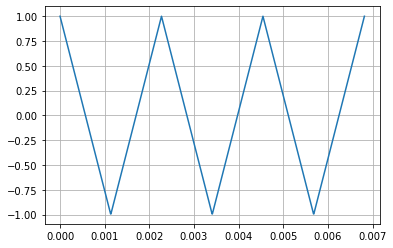

In [13]:
t= np.linspace(0, (1/440)*3, 1000) # 畫 3 個週期
x= ryTri(t)
pl.plot(t,x)
pl.grid()

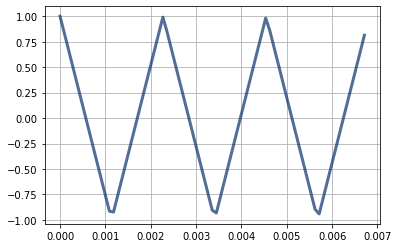

In [14]:
y= td.TriangleSignal()
y.plot()
pl.grid()

- 以下，我們回到作者寫法：

```python
class TriangleSignal(Sinusoid):
    """Represents a triangle signal."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        ts = np.asarray(ts)
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = np.abs(frac - 0.5)
        ys = normalize(unbias(ys), self.amp)
        return ys
```

- 1. 

首先，class TriangleSignal 繼承了 class Sinusoid 
(我們也記得 class Sinusoid 繼承 class Signal)

``` python
class Signal:
    def period(self):
    def plot(self, framerate=11025):
    def make_wave(self, duration=1, start=0, framerate=11025):

class Sinusoid(Signal):    
    def period(self):
    def evaluate(self, ts):

class TriangleSignal(Sinusoid):
    def evaluate(self, ts):
```

- 2.

最上層的 class Signal 並未定義 任何數學函數來計算信號的數值，

接下來 的 class Sinusoid 
利用 def evaluate 
來定義 數學函數為 np.sin 或 np.cos


- 3.

接下來的 class TriangleSignal 則是覆寫(overwrite) def evaluate:
運用一些數學推導，創造出三角波的形狀的數學函數。

- 4. 

作者使用的數學原理在此解析一下：



```python
ts = np.asarray(ts)
cycles = self.freq * ts + self.offset / PI2
frac, _ = np.modf(cycles)
ys = np.abs(frac - 0.5)
ys = normalize(unbias(ys), self.amp)
```

In [15]:
# 查 3 個函數的意義:

#np.modf?
# equivalent to "x % 1.0" (有小數的實數，除以 1.0 的餘數)
# modf(+1.6) == +0.6
# modf(-1.6) == -0.6   (注意一下，-1.6 % 1.0 == +0.4)

#td.unbias?
# zero mean it

#td.normalize??
# scale the ampplitude into -amp, +amp




In [16]:
np.modf(-1.9), (-1.9)%1.0

((-0.8999999999999999, -1.0), 0.10000000000000009)

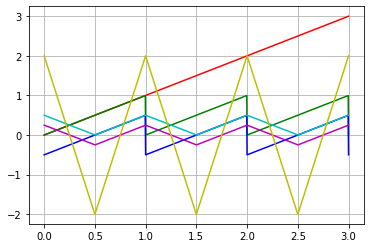

In [17]:
# 逐行解析作者的演算法

import numpy as np
import thinkdsp as td
import matplotlib.pyplot as pl

ts= np.linspace(0,3,1000) # 設定時間序列為 0 ~ 3 sec (取1000點)

offset=0
freq=  1
amp=   2

t=       np.asarray(ts)
cycles=  freq * t + offset / (np.pi*2) #PI2

#frac, _= np.modf(cycles) # 逐行解析過程，發現此行有問題，在t 落於負值時有誤，需用下行修正之。

frac= cycles%1.0 # 除以 1.0，取餘數(=小數)，周而復始，週期性出現。週期 = 1.0 (cycle)

y0= frac - .5             # 圖形 下移 .5
y1= np.abs(y0)            # 取絕對值，負的部分翻上來
y2= td.unbias(y1)         # zero-mean y1
y3= td.normalize(y2, amp) # scaling to -amp ~ +amp

pl.plot(
    t, cycles,'r',
    t, frac,  'g',
    t, y0,    'b', 
    t, y1,    'c', 
    t, y2,    'm',
    t, y3,    'y'
    )

pl.grid()

- 解析過作者的 class TriangleSignal， 我們也來把自己寫的 def ryTri 改寫成 class RyTriSignal ...


In [18]:
from thinkdsp import Sinusoid

class RyTriSignal(Sinusoid):
    """ry Represents a triangle signal."""
    
    # 把原來的 class TriangleSignal 中的 def evaluate 改寫掉！！
    
    '''
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times

        returns: float wave array
        """
        ts = np.asarray(ts)
        
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = np.abs(frac - 0.5)
        ys = normalize(unbias(ys), self.amp)
        
        return ys
    '''
    
    # 把我們已寫好測試過的 函數 copy 過來，比對一下，做幾個語法上的修正。
    
    #def ryTri(t, amp=1, freq=440, offset=0 ):
    
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= θ *(-2/np.pi) +1
        x1= θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

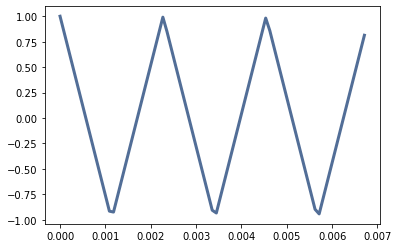

In [19]:
x= RyTriSignal()
x.plot()

In [20]:
w= x.make_wave()
w.make_audio()

- 大功告成！！

Here’s the code that generates Figure 2.1:

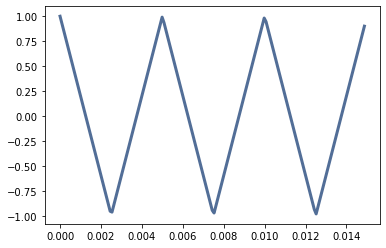

In [21]:
# 使用 作者 thinkdsp 的 class TriangleSignal

signal = thinkdsp.TriangleSignal(200)
signal.plot()

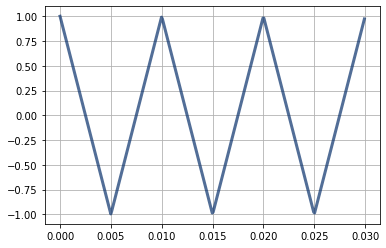

In [22]:
# 使用自己的 class RyTriSignal

rySignal= RyTriSignal(freq= 100)
rySignal.plot()
pl.grid()

- 接下來再回到 教科書 提到的 三角信號的 頻譜....


![](../textbook/fg/thinkdsp007.png)

Figure 2.2: 
Spectrum of a triangle signal at 200 Hz, shown on two vertical scales. 
The version on the right cuts off the fundamental to show the harmonics more clearly.

- Next we can use the 【Signal】 to make a 【Wave】, and use the Wave to make a 【Spectrum】:


    - 【Signal】 --->【Wave】---> 【Spectrum】

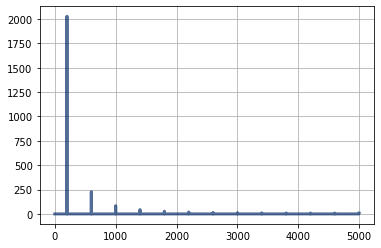

In [23]:
# 自己做做看，並可試著修正 參數 duration=  , framerate= 

wave = signal.make_wave(duration=0.5, framerate=10000)
spectrum = wave.make_spectrum()
spectrum.plot()

pl.grid()

In [24]:
# 看仔細一點...

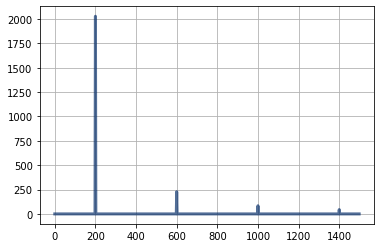

In [25]:
spectrum.plot(high=1500);pl.grid()

- 圖 2.2 的 一些觀察與解釋

- Figure 2.2 shows two views of the result; the view on the right is scaled to show the harmonics more clearly. 
    - As expected, the highest peak is at the fundamental frequency, 200 Hz, and there are additional peaks at harmonic frequencies, which are integer multiples of 200.

- But one `surprise` is that there are `no peaks at the even multiples`: 400, 800, etc. 
    - The harmonics of a triangle wave are `all odd multiples` of the fundamental frequency, in this example 600, 1000, 1400, etc.

- Another feature of this spectrum is the relationship between the amplitude and frequency of the harmonics. Their amplitude `drops off` in proportion to `frequency squared`. 
    - For example the frequency ratio of the first two harmonics (200 and 600 Hz) is 3, and the amplitude ratio is approximately 9. The frequency ratio of the next two harmonics (600 and 1000 Hz) is 1.7, and the amplitude ratio is approximately 1.72 = 2.9. This relationship is called the harmonic structure.
    
- 目前我們僅靠 數值計算、作圖、觀察，得到上述結論。在學到 DFT 時，會用理論來演繹。

## 2.2  Square waves


![](../textbook/fg/thinkdsp008.png)

Figure 2.3: Segment of a square signal at 100 Hz.
thinkdsp also provides SquareSignal, which represents a square signal. Here’s the class definition:

```python
class SquareSignal(Sinusoid):
    
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / PI2
        frac, _ = np.modf(cycles)
        ys = self.amp * np.sign(unbias(frac))
        return ys
```

Like TriangleSignal, SquareSignal inherits `__init__` from `class Sinusoid`, so it takes the same parameters.

And the `def evaluate` method is similar. 
Again, `cycles` is the number of cycles since the start time, 
and `frac` is the fractional part, which ramps from 0 to 1 each period.

`unbias` shifts frac so it ramps from -0.5 to 0.5, 
then `np.sign` maps the negative values to -1 and the positive values to 1. 
Multiplying by `amp` yields a square wave that jumps between -amp and amp.

![](fg/fg_square01.png)


In [5]:
from thinkdsp import Sinusoid
import numpy as np


class RySqrSignal(Sinusoid):
    """ry Represents a square signal."""
        
    def evaluate(self, ts):
    
        θ= ts * 2 * np.pi * self.freq + self.offset # 在此作橫軸之變數變換

        θ= θ % (np.pi * 2) # 這一行讓 θ 周而復始，週期維持在 (2 π)

        x0= -1 #上半周 #θ *(-2/np.pi) +1
        x1= +1 #下半周 #θ *(+2/np.pi) -3

        x= x0 * (θ<np.pi) + x1 * (θ>=np.pi) # 這一行稍微有深度！！

        x= x * self.amp # 最後輸出前，再把縱軸拉到 振幅 = amp

        return x

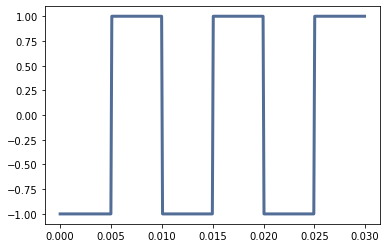

In [7]:
x= RySqrSignal(freq=100)
x.plot()

In [8]:
w= x.make_wave()
w.make_audio()


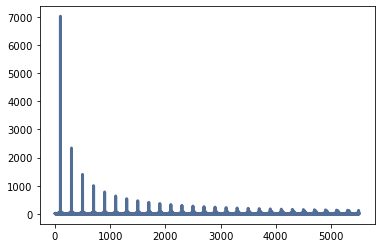

In [9]:
spec= w.make_spectrum()
spec.plot()

![](../textbook/fg/thinkdsp009.png)

Figure 2.4: Spectrum of a square signal at 100 Hz.
Figure 2.3 shows three periods of a square wave with frequency 100 Hz, and Figure 2.4 shows its spectrum.

Like a triangle wave, the square wave contains only odd harmonics, which is why there are peaks at 300, 500, and 700 Hz, etc. But the amplitude of the harmonics drops off more slowly. Specifically, amplitude drops in proportion to frequency (not frequency squared).

The exercises at the end of this chapter give you a chance to explore other waveforms and other harmonic structures.

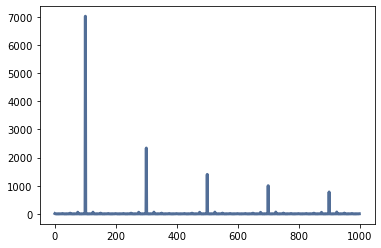

In [14]:
spec.plot(high=1000)


In [18]:
# 比較一下，三角波形方波形的頻譜。(在相同的基本頻率  freq=100 之下)
import thinkdsp as td
import matplotlib.pyplot as pl


xTri= td.TriangleSignal(freq=100)
xSqr= td.SquareSignal(freq=100)

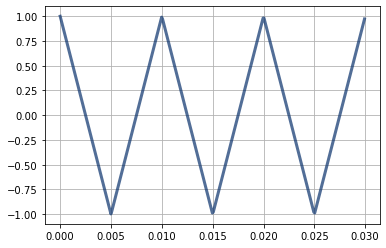

In [19]:
xTri.plot()
pl.grid()

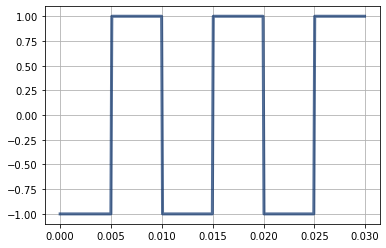

In [20]:
xSqr.plot()
pl.grid()

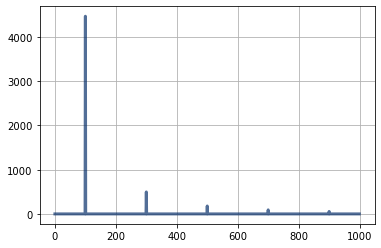

In [25]:
xTri.make_wave().make_spectrum().plot(high=1000)
pl.grid()

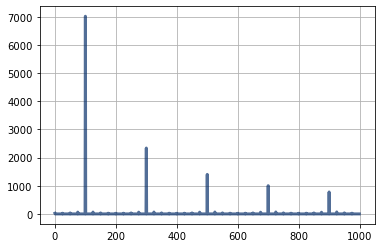

In [26]:
xSqr.make_wave().make_spectrum().plot(high=1000)
pl.grid()

## 2.3  Aliasing


![](../textbook/fg/thinkdsp010.png)

Figure 2.5: Spectrum of a triangle signal at 1100 Hz sampled at 10,000 frames per second. The view on the right is scaled to show the harmonics.
I have a confession. I chose the examples in the previous section carefully to avoid showing you something confusing. But now it’s time to get confused.

Figure 2.5 shows the spectrum of a triangle wave at 1100 Hz, sampled at 10,000 frames per second. Again, the view on the right is scaled to show the harmonics.

The harmonics of this wave should be at 3300, 5500, 7700, and 9900 Hz. In the figure, there are peaks at 1100 and 3300 Hz, as expected, but the third peak is at 4500, not 5500 Hz. The fourth peak is at 2300, not 7700 Hz. And if you look closely, the peak that should be at 9900 is actually at 100 Hz. What’s going on?

The problem is that when you evaluate the signal at discrete points in time, you lose information about what happened between samples. For low frequency components, that’s not a problem, because you have lots of samples per period.

But if you sample a signal at 5000 Hz with 10,000 frames per second, you only have two samples per period. That turns out to be enough, just barely, but if the frequency is higher, it’s not.

To see why, let’s generate cosine signals at 4500 and 5500 Hz, and sample them at 10,000 frames per second:

    framerate = 10000

    signal = thinkdsp.CosSignal(4500)
    duration = signal.period*5
    segment = signal.make_wave(duration, framerate=framerate)
    segment.plot()

    signal = thinkdsp.CosSignal(5500)
    segment = signal.make_wave(duration, framerate=framerate)
    segment.plot()


![](../textbook/fg/thinkdsp011.png)

Figure 2.6: Cosine signals at 4500 and 5500 Hz, sampled at 10,000 frames per second. The signals are different, but the samples are identical.
Figure 2.6 shows the result. I plotted the Signals with thin gray lines and the samples using vertical lines, to make it easier to compare the two Waves. The problem should be clear: even though the Signals are different, the Waves are identical!

When we sample a 5500 Hz signal at 10,000 frames per second, the result is indistinguishable from a 4500 Hz signal. For the same reason, a 7700 Hz signal is indistinguishable from 2300 Hz, and a 9900 Hz is indistinguishable from 100 Hz.

This effect is called aliasing because when the high frequency signal is sampled, it appears to be a low frequency signal.

In this example, the highest frequency we can measure is 5000 Hz, which is half the sampling rate. Frequencies above 5000 Hz are folded back below 5000 Hz, which is why this threshold is sometimes called the “folding frequency”. It is sometimes also called the Nyquist frequency. See http://en.wikipedia.org/wiki/Nyquist_frequency.

The folding pattern continues if the aliased frequency goes below zero. For example, the 5th harmonic of the 1100 Hz triangle wave is at 12,100 Hz. Folded at 5000 Hz, it would appear at -2100 Hz, but it gets folded again at 0 Hz, back to 2100 Hz. In fact, you can see a small peak at 2100 Hz in Figure 2.4, and the next one at 4300 Hz.

## 2.4  Computing the spectrum

We have seen the Wave method make_spectrum several times. Here is the implementation (leaving out some details we’ll get to later):

from np.fft import rfft, rfftfreq


class Wave:

    def make_spectrum(self):
        n = len(self.ys)
        d = 1 / self.framerate

        hs = rfft(self.ys)
        fs = rfftfreq(n, d)

        return Spectrum(hs, fs, self.framerate)
        
The parameter self is a Wave object. n is the number of samples in the wave, and d is the inverse of the frame rate, which is the time between samples.

np.fft is the NumPy module that provides functions related to the Fast Fourier Transform (FFT), which is an efficient algorithm that computes the Discrete Fourier Transform (DFT).

make_spectrum uses rfft, which stands for “real FFT”, because the Wave contains real values, not complex. Later we’ll see the full FFT, which can handle complex signals (see Section 7.9). The result of rfft, which I call hs, is a NumPy array of complex numbers that represents the amplitude and phase offset of each frequency component in the wave.

The result of rfftfreq, which I call fs, is an array that contains frequencies corresponding to the hs.

To understand the values in hs, consider these two ways to think about complex numbers:

A complex number is the sum of a real part and an imaginary part, often written x + iy, where i is the imaginary unit, √−1. You can think of x and y as Cartesian coordinates.
A complex number is also the product of a magnitude and a complex exponential, A ei φ, where A is the magnitude and φ is the angle in radians, also called the “argument”. You can think of A and φ as polar coordinates.
Each value in hs corresponds to a frequency component: its magnitude is proportional to the amplitude of the corresponding component; its angle is the phase offset.

The Spectrum class provides two read-only properties, amps and angles, which return NumPy arrays representing the magnitudes and angles of the hs. When we plot a Spectrum object, we usually plot amps versus fs. Sometimes it is also useful to plot angles versus fs.

Although it might be tempting to look at the real and imaginary parts of hs, you will almost never need to. I encourage you to think of the DFT as a vector of amplitudes and phase offsets that happen to be encoded in the form of complex numbers.

To modify a Spectrum, you can access the hs directly. For example:

spectrum.hs *= 2
spectrum.hs[spectrum.fs > cutoff] = 0
The first line multiplies the elements of hs by 2, which doubles the amplitudes of all components. The second line sets to 0 only the elements of hs where the corresponding frequency exceeds some cutoff frequency.

But Spectrum also provides methods to perform these operations:

spectrum.scale(2)
spectrum.low_pass(cutoff)
You can read the documentation of these methods and others at http://greenteapress.com/thinkdsp.html.

At this point you should have a better idea of how the Signal, Wave, and Spectrum classes work, but I have not explained how the Fast Fourier Transform works. That will take a few more chapters.

## 2.5  Exercises

Solutions to these exercises are in chap02soln.ipynb.

Exercise 1   If you use Jupyter, load chap02.ipynb and try out the examples. You can also view the notebook at http://tinyurl.com/thinkdsp02.
Exercise 2   A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1 and repeats. See http://en.wikipedia.org/wiki/Sawtooth_wave
Write a class called SawtoothSignal that extends Signal and provides evaluate to evaluate a sawtooth signal.

Compute the spectrum of a sawtooth wave. How does the harmonic structure compare to triangle and square waves?

Exercise 3   Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?
Exercise 4   If you have a spectrum object, spectrum, and print the first few values of spectrum.fs, you’ll see that they start at zero. So spectrum.hs[0] is the magnitude of the component with frequency 0. But what does that mean?
Try this experiment:

Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
Make a Spectrum object and print spectrum.hs[0]. What is the amplitude and phase of this component?
Set spectrum.hs[0] = 100. What effect does this operation have on the waveform? Hint: Spectrum provides a method called make_wave that computes the Wave that corresponds to the Spectrum.
Exercise 5   Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Hint: since division by zero is undefined, you might want to set spectrum.hs[0] = 0.
Test your function using a square, triangle, or sawtooth wave.

Compute the Spectrum and plot it.
Modify the Spectrum using your function and plot it again.
Use Spectrum.make_wave to make a Wave from the modified Spectrum, and listen to it. What effect does this operation have on the signal?
Exercise 6   Triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to 1/f; the harmonics of the triangle wave drop off like 1/f2. Can you find a waveform that has even and odd harmonics that drop off like 1/f2?
Hint: There are two ways you could approach this: you could construct the signal you want by adding up sinusoids, or you could start with a signal that is similar to what you want and modify it.